# Lab 8 : Star Formation 

In [11]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [28]:
#  Funcion that returns the star formation rate given the luminosty of the galaxy.
def StarFormationRate(L,Type,TIR=0):
    """ Computes the star formation rate of a galaxy following Kennicutt @ Evans 2012 Eq 12
        Inputs:
            L =luminosity of the galaxy in erg/s
            Type = string that lists the wavelength : FUV, NUV, TIR, Halpha
            TIR = Total Infrared Lumnosity (default = 0)
        Returns:
            Log of the Star Formation Rate (Msun/year) 
            """
    if (Type == 'FUV'):
        logCx = 43.35 # Calibration from L to SFR from Table 1 (K&E 2012)
        TIRc = 0.46 # Correction from the dust absoprtion from Table 2
    elif (Type == 'NUV'):
        logCx = 43.17
        TIRc = 0.27
    elif (Type == 'Halpha'):
        logCx = 41.27
        TIRc = 0.0024
    elif (Type == 'TIR'):
        logCx = 43.41
        TIRc = 0
    else:
        print("Missing  Wavelength: FUV, NUV, Halpha, TIR")
        
    # Correct the Luminosity for dust 
    Lnew = L + TIRc*TIR
        
    return np.log10(Lnew) - logCx
            
            

Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [29]:
LsunErgS = const.L_sun.to(u.erg/u.s).value

In [30]:
#  WLM Dwarf Irregular Galaxy
# Lee et al. 2009 WLM galaxy log(SFR) derived from UV is -2.21 --> Galex
# From NED : WLM NUV luminosity (GALEX) 1.71e7 Lsun
# FROM NED : WLM NIR luminosity (IRAC) 2.48e6 Lsun
NUV_WLM = 1.71e7*LsunErgS
TIR_WLM = 2.48e6*LsunErgS

StarFormationRate(NUV_WLM, 'NUV', TIR_WLM)


-2.3373504191027266

In [31]:
#  N24 Sc galaxy

# Lee et al. 2009 NGC 24 log(SFP) derived from UV as -0.7
# FROM NED: NGC 24 NUV luminosity (GALEX) 2.96e8 Lsun
# FROM NED: NGC 24 FIR lumiosity (MIPG) 3.09e8 Lsun
# FROM NED: NGC 24 NIR luminosty (2MASS) 8.34e8 Lsun

NUV_N24 = 2.96e8*LsunErgS
TIR_N24 = 3.09e8*LsunErgS + 8.34e8*LsunErgS


StarFormationRate(NUV_N24, 'NUV', TIR_N24)

-0.8055527449424105

# Part B Star formation main sequence

Write a function that returns the average SFR of a galaxy at a given redshift. 

What is the average SFR of a MW mass galaxy today? at z=1?

Plot the SFR main sequence for a few different redshifts.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

In [37]:
# Create a function that returns the SFR main sequence 
def SFRMainSequence(Mstar,z):
    """ Average SFR of a galaxy as a function of stellar mass and redshift
        input:
            s = redshift
            Mstar = Stellar mass of the galaxy in Msun
        returns: 
            log(SFR (Msun/year))"""
    alpha = 0.7 - 0.13*z
    beta = 0.38 + 1.14*z - 0.19*z**2
    
    return alpha*(np.log10(Mstar) - 10.5) + beta

In [38]:
# MW at z=0

10**SFRMainSequence(6e10, 0)
# actual star formation rate of the MW is only 1 Msun/year

3.7558295562247412

In [39]:
# MW at z = 1
10**SFRMainSequence(6e10, 4)



89.13889068294495

In [41]:
# create an array of stellar masses
Mass = np.linspace(1e9, 1e12)

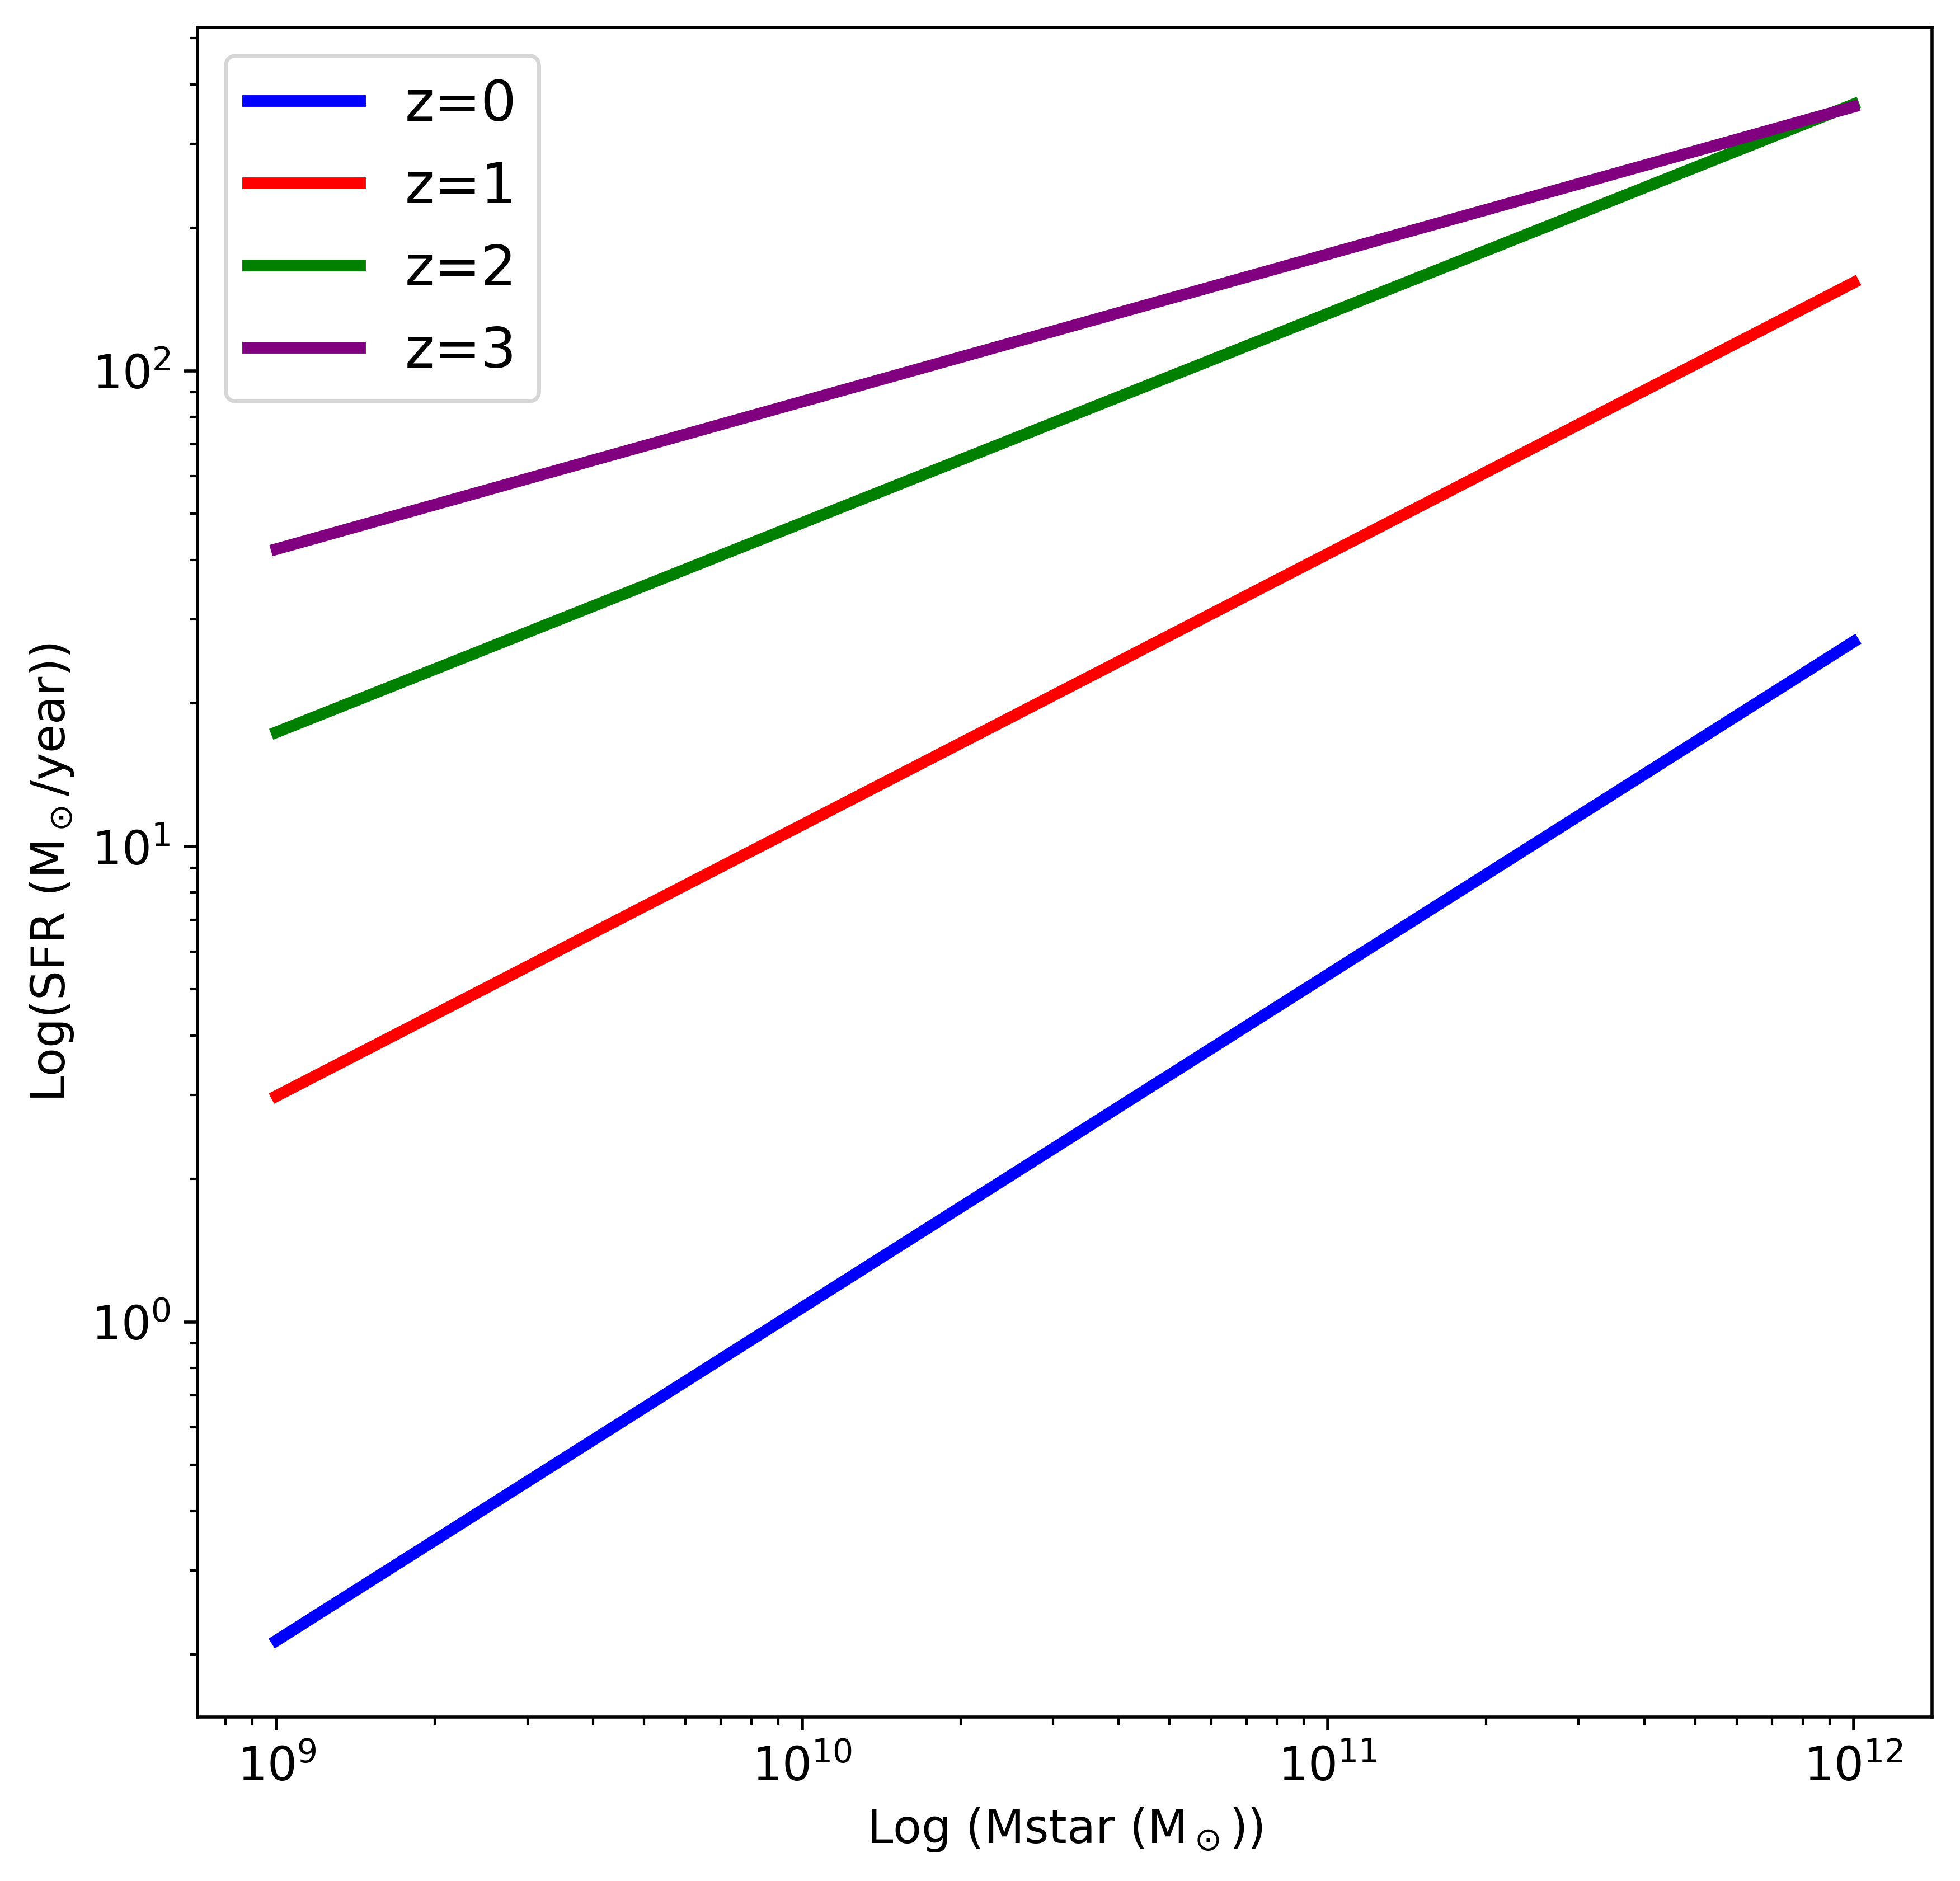

In [46]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.loglog(Mass, 10**SFRMainSequence(Mass,0), color='blue', linewidth=3, label='z=0')
plt.loglog(Mass, 10**SFRMainSequence(Mass,1), color='red', linewidth=3, label='z=1')
plt.loglog(Mass, 10**SFRMainSequence(Mass,2), color='green', linewidth=3, label='z=2')
plt.loglog(Mass, 10**SFRMainSequence(Mass,3), color='purple', linewidth=3, label='z=3')

# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Part C  Starbursts

What are the star formation rates for :

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [51]:
# normal galaxies  Lir = 10*10 Lsun

TIR_Normal = 1e10*LsunErgS
10**StarFormationRate(TIR_Normal, 'TIR')


1.4892648150381245

In [52]:
# LIRGs  

TIR_Normal = 1e11*LsunErgS
10**StarFormationRate(TIR_Normal, 'TIR')

14.892648150381245

In [53]:
# ULIRGs

TIR_Normal = 1e12*LsunErgS
10**StarFormationRate(TIR_Normal, 'TIR')

148.92648150381245

In [54]:
# HLIRGs

TIR_Normal = 1e13*LsunErgS
10**StarFormationRate(TIR_Normal, 'TIR')

1489.2648150381244